In [1]:
# from ler import LeR
import numpy as np
import matplotlib.pyplot as plt

import ler.gw_source_population as gwpop

In [2]:
ler_median = gwpop.CBCSourceRedshiftDistribution()


Initializing CBCSourceRedshiftDistribution class...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_0.json
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.json
using ler available merger rate density model: merger_rate_density_madau_dickinson_belczynski_ng
merger_rate_density_madau_dickinson_belczynski_ng interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_madau_dickinson_belczynski_ng_5.json
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_6.json
source_redshift interpolator will be loaded from ./interpolator_json/source_redshift/source_redshift_2.json


In [3]:
ler_median.available_merger_rate_density_model

{'merger_rate_density_bbh_oguri2018': {'R0': 1.9e-08,
  'b2': 1.6,
  'b3': 2.1,
  'b4': 30},
 'merger_rate_density_madau_dickinson2014': {'R0': 1.9e-08,
  'a': 0.015,
  'b': 2.7,
  'c': 2.9,
  'd': 5.6},
 'merger_rate_density_madau_dickinson_belczynski_ng': {'R0': 1.9e-08,
  'alpha_F': 2.57,
  'beta_F': 5.83,
  'c_F': 3.36},
 'sfr_with_time_delay': {'R0': 1.9e-08,
  'a': 0.01,
  'b': 2.6,
  'c': 3.2,
  'd': 6.2,
  'td_min': 0.01,
  'td_max': 10.0},
 'merger_rate_density_bbh_popIII_ken2022': {'R0': 1.92e-08,
  'aIII': 0.66,
  'bIII': 0.3,
  'zIII': 11.6},
 'merger_rate_density_bbh_primordial_ken2022': {'R0': 4.4e-11,
  't0': 13.786885302009708}}

In [4]:
print(gwpop.merger_rate_density_madau_dickinson_belczynski_ng_function.__doc__)


    Compute BBH merger rate density following Ng et al. (2021).

    This model uses a Madau-Dickinson-like functional form to fit the 
    merger rate density of field BHs, accounting for time delays and 
    metallicity effects. Coefficients from Madau & Dickinson (2014) are translated as: B-> alpha_F, D-> beta_F, C-> c_F.

    density(zs) ∝ (1 + zs) ** alpha_F / (1 + ((1 + zs) / c_F) ** beta_F)

    Parameters
    ----------
    zs : ``float`` or ``numpy.ndarray``
        Source redshifts.
    R0 : ``float``
        Local merger rate density (Mpc^-3 yr^-1). 

        default: 19e-9
    alpha_F : ``float``
        Low-redshift power-law slope. 

        default: 2.57
    beta_F : ``float``
        High-redshift power-law slope. 

        default: 5.83
    c_F : ``float``
        Turnover redshift parameter. 

        default: 3.36

    Returns
    -------
    rate_density : ``float`` or ``numpy.ndarray``
        Merger rate density (Mpc^-3 yr^-1).

    Examples
    --------
    >>> 

In [5]:
print(gwpop.sfr_madau_dickinson2014.__doc__)


    Compute star formation rate using Madau & Dickinson (2014) model.

    Reference: Eqn. 15 of https://arxiv.org/pdf/1403.0007

    Parameters
    ----------
    zs : ``float`` or ``numpy.ndarray``
        Source redshifts.
    a : ``float``
        Normalization parameter. 

        default: 0.015
    b : ``float``
        Low-redshift power-law slope. 

        default: 2.7
    c : ``float``
        Turnover redshift parameter. 

        default: 2.9
    d : ``float``
        High-redshift power-law slope. 

        default: 5.6

    Returns
    -------
    SFR : ``float`` or ``numpy.ndarray``
        Star formation rate (Msun yr^-1 Mpc^-3).

    Examples
    --------
    >>> from ler.gw_source_population import sfr_madau_dickinson2014
    >>> sfr = sfr_madau_dickinson2014(zs=np.array([0.1]))
    


In [6]:
gwpop.CBCSourceRedshiftDistribution?

Init signature:
gwpop.CBCSourceRedshiftDistribution(
    npool=4,
    z_min=0.001,
    z_max=10.0,
    event_type='BBH',
    merger_rate_density=None,
    merger_rate_density_param=None,
    cosmology=None,
    directory='./interpolator_json',
    create_new_interpolator=False,
)
Docstring:     
Class for generating compact binary coalescence source redshift distributions.

This class generates source redshift distributions for compact binary
coalescence events (BBH, BNS, NSBH) using various astrophysical merger rate
density models. It provides interpolated functions for efficient sampling of
source redshifts weighted by the merger rate density in the detector frame.

Key Features: 

- Multiple merger rate density models (PopI/II, PopIII, Primordial) 

- Configurable cosmology for distance calculations 

- Cached interpolators for computational efficiency 

- Support for user-defined merger rate density functions 


Parameters
----------
npool : ``int``
    Number of processors to use 

In [7]:
# 'merger_rate_density_madau_dickinson_belczynski_ng': {'R0': 1.9e-08,
#   'alpha_F': 2.57,
#   'beta_F': 5.83,
#   'c_F': 3.36},

ler_median = gwpop.CBCSourceRedshiftDistribution(
    merger_rate_density='merger_rate_density_madau_dickinson_belczynski_ng',
    merger_rate_density_param=dict(
        R0=1.4e-08,
        alpha_F=2.57,
        beta_F=5.83,
        c_F=3.36,
    )
)

ler_low = gwpop.CBCSourceRedshiftDistribution(
    merger_rate_density='merger_rate_density_madau_dickinson_belczynski_ng',
    merger_rate_density_param=dict(
        R0=0.63e-08,
        alpha_F=2.57,
        beta_F=5.83,
        c_F=3.36,
    )
)

ler_high = gwpop.CBCSourceRedshiftDistribution(
    merger_rate_density='merger_rate_density_madau_dickinson_belczynski_ng',
    merger_rate_density_param=dict(
        R0=2.6e-08,
        alpha_F=2.57,
        beta_F=5.83,
        c_F=3.36,
    )
)


Initializing CBCSourceRedshiftDistribution class...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distance/luminosity_distance_0.json
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.json
using ler available merger rate density model: merger_rate_density_madau_dickinson_belczynski_ng
merger_rate_density_madau_dickinson_belczynski_ng interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_madau_dickinson_belczynski_ng_7.json
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_json/merger_rate_density/merger_rate_density_detector_frame_8.json
source_redshift interpolator will be loaded from ./interpolator_json/source_redshift/source_redshift_3.json

Initializing CBCSourceRedshiftDistribution class...

luminosity_distance interpolator will be loaded from ./interpolator_json/luminosity_distan

In [8]:
zs = np.linspace(0.01, 6.0, 200)

Rz_median = ler_median.merger_rate_density(zs)
Rz_low = ler_low.merger_rate_density(zs)
Rz_high = ler_high.merger_rate_density(zs)

Pz_median = ler_median.source_redshift.pdf(zs)
Pz_low = ler_low.source_redshift.pdf(zs)
Pz_high = ler_high.source_redshift.pdf(zs)

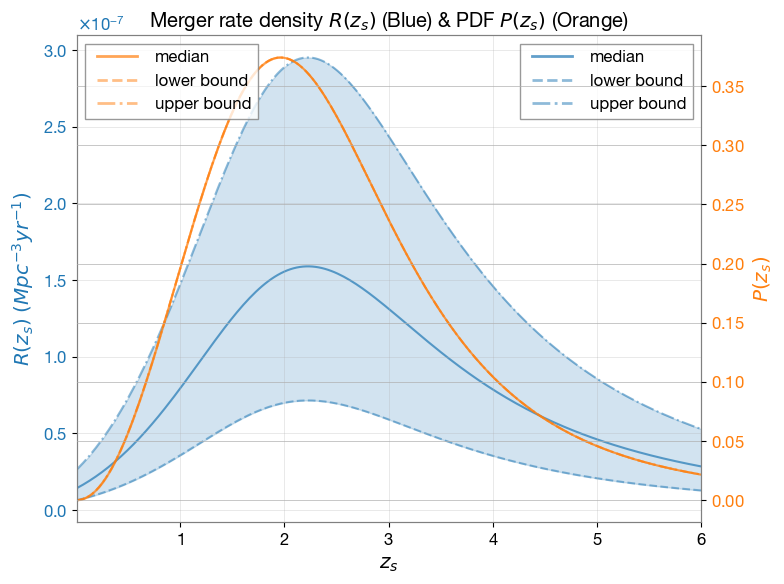

In [9]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Left y-axis: R(z)
color = 'C0'
ax1.set_xlabel(r'$z_s$')
ax1.set_ylabel(r"$R(z_s)$ $(Mpc^{-3} yr^{-1})$", color=color)
ax1.plot(zs, Rz_median, color=color, linestyle='-', alpha=0.7, label="median")
ax1.plot(zs, Rz_low, color=color, linestyle='--', alpha=0.5, label="lower bound")
ax1.plot(zs, Rz_high, color=color, linestyle='-.', alpha=0.5, label="upper bound")
ax1.fill_between(zs, Rz_low, Rz_high, color=color, alpha=0.2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.4)
legend1 = ax1.legend(loc='upper right', handlelength=3)
for handle in legend1.get_lines():
    handle.set_linewidth(2)
ax1.set_xlim(0.01, 6)

# Right y-axis: P(z)
ax2 = ax1.twinx()
color = 'C1'
ax2.set_ylabel(r'$P(z_s)$', color=color)
ax2.plot(zs, Pz_median, color=color, linestyle='-', alpha=0.7, label="median")
ax2.plot(zs, Pz_low, color=color, linestyle='--', alpha=0.5, label="lower bound")
ax2.plot(zs, Pz_high, color=color, linestyle='-.', alpha=0.5, label="upper bound")
ax2.fill_between(zs, Pz_low, Pz_high, color=color, alpha=0.2)
ax2.tick_params(axis='y', labelcolor=color)
legend2 = ax2.legend(loc='upper left', handlelength=3)
for handle in legend2.get_lines():
    handle.set_linewidth(2)

plt.title("Merger rate density $R(z_s)$ (Blue) & PDF $P(z_s)$ (Orange)")
plt.tight_layout()
plt.savefig("Merger_rate_density_and_PDF_of_redshift.png", dpi=150)
plt.show()

**Figure 1: BBH Merger Rate Density and Source Redshift Distribution**

This figure shows the redshift evolution of the merger rate density $R(z_s)$ (blue, left axis) and probability density function $P(z_s)$ (orange, right axis) for binary black hole mergers following a Madau-Dickinson-like functional form that accounts for time delays and metallicity effects (Ng et al. 2021). The merger rate density is shown in units of $\mathrm{Mpc}^{-3}\,\mathrm{yr}^{-1}$ with median estimate for the local merger rate density $R_0 = 1.4 \times 10^{-8}$ (solid line) and uncertainty bounds at $R_0 = 0.63 \times 10^{-8}$ (lower) and $R_0 = 2.6 \times 10^{-8}$ (upper), indicated by the shaded region. The normalized $P(z_s)$ is identical across all models since the local rate $R_0$ cancels in the probability calculation. The rate peaks at $z_s \approx 2$, reflecting cosmic star formation history modulated by delay times, and declines at higher redshifts, providing key insights for gravitational wave detection forecasts and understanding the cosmic evolution of compact binaries.

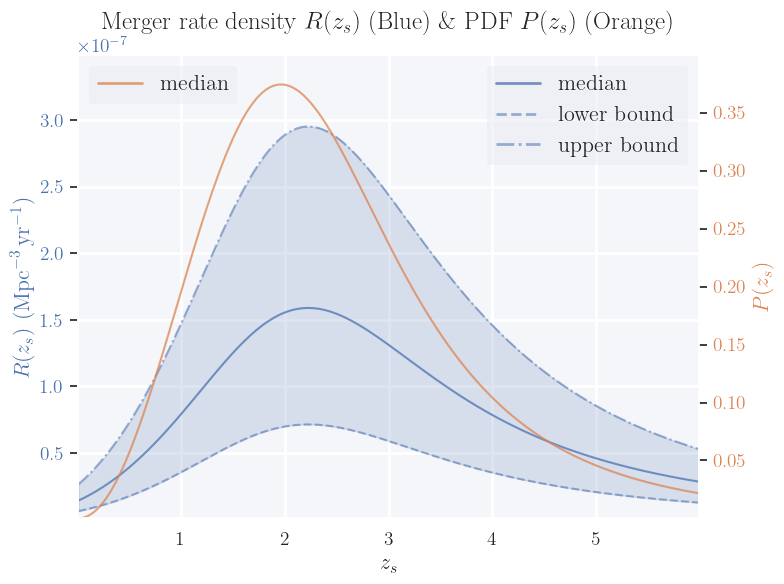

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Reset + sns theme
mpl.rcParams.update(mpl.rcParamsDefault)

LIGHT_BG = "#F5F6FA"   # panel background (very light)
LEG_BG   = "#E9EBF2"   # legend background (slightly darker so it shows)

sns.set_theme(
    style="darkgrid",
    context="notebook",
    rc={
        "axes.facecolor": LIGHT_BG,
        "figure.facecolor": "white",
        "axes.grid": True,
        "grid.color": "white",
        "grid.linestyle": "-",
        "grid.linewidth": 2.0,  # wider gridlines
        "grid.alpha": 1.0,
        "axes.axisbelow": True,
    }
)

# If you want LaTeX + serif, keep it here
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "custom",
    "savefig.dpi": 300,
    "axes.labelsize": 16,      # axis label size
    "xtick.labelsize": 14,     # x tick label size
    "ytick.labelsize": 14,     # y tick label size
    "legend.fontsize": 16,     # legend text size
    "legend.title_fontsize": 17, # legend title size
    "axes.titlesize": 18       # title size
})

fig, ax1 = plt.subplots(figsize=(8, 6))

# --- Left y-axis: R(z) ---
c1 = "C0"
ax1.set_xlabel(r"$z_s$", fontsize=16)
ax1.set_ylabel(r"$R(z_s)$ $(\mathrm{Mpc}^{-3}\,\mathrm{yr}^{-1})$", color=c1, fontsize=16)

ax1.plot(zs, Rz_median, color=c1, linestyle="-",  alpha=0.75, label="median")
ax1.plot(zs, Rz_low,    color=c1, linestyle="--", alpha=0.55, label="lower bound")
ax1.plot(zs, Rz_high,   color=c1, linestyle="-.", alpha=0.55, label="upper bound")
ax1.fill_between(zs, Rz_low, Rz_high, color=c1, alpha=0.18)

ax1.tick_params(axis="y", labelcolor=c1, labelsize=14)
ax1.tick_params(axis="x", labelsize=14)
ax1.set_xlim(0.001, 6.0-0.001)
ax1.set_ylim(0.01e-7,3.5e-7-0.01e-7)


# Keep background + white grid consistent (twin axes can override)
ax1.set_facecolor(LIGHT_BG)
ax1.grid(True, color="white", linewidth=2.0, alpha=1.0)  # wider gridlines

leg1 = ax1.legend(loc="upper right", handlelength=2, frameon=True, fontsize=16, title_fontsize=17)
for h in leg1.get_lines():
    h.set_linewidth(2.0)
f1 = leg1.get_frame()
f1.set_facecolor(LEG_BG)
f1.set_edgecolor("none")
f1.set_linewidth(0.0)
f1.set_alpha(0.5)

# --- Right y-axis: P(z) ---
ax2 = ax1.twinx()
c2 = "C1"
ax2.set_ylabel(r"$P(z_s)$", color=c2, fontsize=16)

ax2.plot(zs, Pz_median, color=c2, linestyle="-",  alpha=0.75, label="median")

ax2.tick_params(axis="y", labelcolor=c2, labelsize=14)

# Make twin axis background transparent so it doesn't mess with the panel
ax2.set_facecolor("none")
ax2.grid(False)

ax2.set_ylim(0.0001,0.40-0.0001)

leg2 = ax2.legend(loc="upper left", handlelength=2, frameon=True, fontsize=16, title_fontsize=17)
for h in leg2.get_lines():
    h.set_linewidth(2.0)
f2 = leg2.get_frame()
f2.set_facecolor(LEG_BG)
f2.set_edgecolor("none")    
f2.set_linewidth(0.0)
f2.set_alpha(0.5)


plt.title(r"Merger rate density $R(z_s)$ (Blue) \& PDF $P(z_s)$ (Orange)", fontsize=18)
fig.tight_layout()

# If legends are near edges, include them to avoid clipping
fig.savefig(
    "Merger_rate_density_and_PDF_of_redshift.png",
    dpi=200,
    bbox_inches="tight",
    bbox_extra_artists=(leg1, leg2),
)
plt.show()


## lensed

In [12]:
# Import LeR
from ler.rates import LeR

# Initialize LeR with default settings
# npool: number of parallel processes for sampling
ler = LeR(
    npool=6,
    event_type='BBH',
    spin_zeros=False,
    spin_precession=True,
    snr_method='interpolation_aligned_spins',
    snr_recalculation=True,
    snr_recalculation_range=[5, 15],
    waveform_approximant='IMRPhenomXPHM',  # Waveform model
)


Initializing LeR class...


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

comoving_distance interpolator will be loaded from ./interpolator_json/comoving_distance/comoving_distance_0.json
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_0.json
angular_diameter_distance interpolator will be loaded from ./interpolator_json/angular_diameter_distance/angular_diameter_distance_0.json
differential_comoving_volume interpolator will be loaded from ./interpolator_json/differential_comoving_volume/differential_comoving_volume_0.json
using ler available velocity dispersion function : velocity_dispersion_ewoud
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_json/velocity_dispersion/velocity_dispersion_ewoud_0.json
using ler available axis_ratio function : axis_ratio_rayleigh
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_json/a

In [97]:
zs = np.linspace(0.001, 10.0-0.001, 200)
Pzs = ler.source_redshift.pdf(zs)
Pzs_sl = ler.source_redshift_sl.pdf(zs)
tau = ler.optical_depth.function(zs)
# Pzl is derivative of tau at z
# Pzl = np.gradient(tau, zs)/ler.optical_depth.function(np.array([10.0]))
from scipy.stats import gaussian_kde
zs_ = ler.source_redshift_sl.rvs(50000)
Pzl_samples = ler.lens_redshift.rvs(50000, zs_)
kde_zl = gaussian_kde(Pzl_samples, bw_method=0.3)
Pzl = kde_zl(zs)
# Normalize Pzl
Pzl = Pzl / np.trapz(Pzl, zs)   

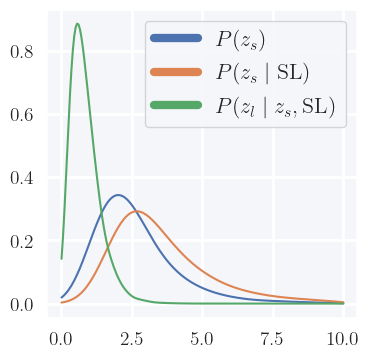

In [ ]:
from scipy.stats import gaussian_kde
zs = np.linspace(0.001, 10.0-0.001, 200)

zs_ = ler.source_redshift.rvs(50000)
kde_zs = gaussian_kde(zs_, bw_method=0.3)
Pzs = kde_zs(zs)

zs_sl = ler.source_redshift_sl.rvs(50000)
kde_zs_sl = gaussian_kde(zs_sl, bw_method=0.3)
Pzs_sl = kde_zs_sl(zs)

Pzl_samples = ler.lens_redshift.rvs(50000, zs_)
kde_zl = gaussian_kde(Pzl_samples, bw_method=0.3)
Pzl = kde_zl(zs)

plt.figure(figsize=(4,4))
plt.plot(zs, Pzs, label=r'$P(z_s)$')
plt.plot(zs, Pzs_sl, label=r'$P(z_s\mid {\rm SL})$')
plt.plot(zs, Pzl, label=r'$P(z_l\mid z_s, {\rm SL})$')

plt.legend()
plt.show()

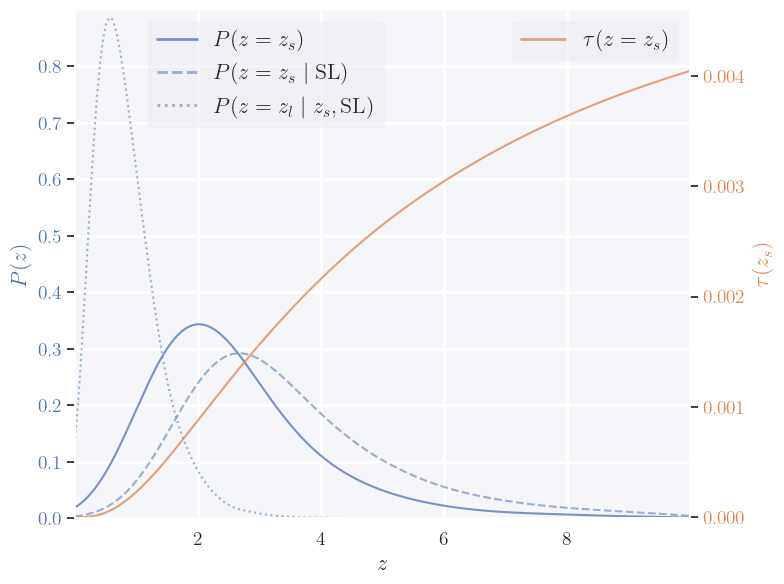

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Reset + sns theme
mpl.rcParams.update(mpl.rcParamsDefault)

LIGHT_BG = "#F5F6FA"   # panel background (very light)
LEG_BG   = "#E9EBF2"   # legend background (slightly darker so it shows)

sns.set_theme(
    style="darkgrid",
    context="notebook",
    rc={
        "axes.facecolor": LIGHT_BG,
        "figure.facecolor": "white",
        "axes.grid": True,
        "grid.color": "white",
        "grid.linestyle": "-",
        "grid.linewidth": 2.0,  # wider gridlines
        "grid.alpha": 1.0,
        "axes.axisbelow": True,
    }
)

# If you want LaTeX + serif, keep it here
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "custom",
    "savefig.dpi": 300,
    "axes.labelsize": 16,      # axis label size
    "xtick.labelsize": 14,     # x tick label size
    "ytick.labelsize": 14,     # y tick label size
    "legend.fontsize": 16,     # legend text size
    "legend.title_fontsize": 17, # legend title size
    "axes.titlesize": 18       # title size
})

fig, ax1 = plt.subplots(figsize=(8, 6))

# --- Left y-axis: R(z) ---
c1 = "C0"
ax1.set_xlabel(r"$z$", fontsize=16)
ax1.set_ylabel(r"$P(z)$", color=c1, fontsize=16)

ax1.plot(zs, Pzs, color=c1, linestyle="-",  alpha=0.75, label=r"$P(z=z_s)$")
ax1.plot(zs, Pzs_sl,    color=c1, linestyle="--", alpha=0.55, label=r"$P(z=z_s\mid {\rm SL})$")
ax1.plot(zs, Pzl,    color=c1, linestyle=":", alpha=0.55, label=r"$P(z=z_l\mid z_s, {\rm SL})$")

ax1.tick_params(axis="y", labelcolor=c1, labelsize=14)
ax1.tick_params(axis="x", labelsize=14)
ax1.set_xlim(0.001, 10.0-0.001)
ax1.set_ylim(-0.0001,0.9-0.0001)

# Keep background + white grid consistent (twin axes can override)
ax1.set_facecolor(LIGHT_BG)
ax1.grid(True, color="white", linewidth=2.0, alpha=1.0)  # wider gridlines

leg1 = ax1.legend(loc="upper left", bbox_to_anchor=(0.1, 1), handlelength=1.8, frameon=True, fontsize=16, title_fontsize=17)
for h in leg1.get_lines():
    h.set_linewidth(2.0)
f1 = leg1.get_frame()
f1.set_facecolor(LEG_BG)
f1.set_edgecolor("none")
f1.set_linewidth(0.0)
f1.set_alpha(0.5)

# --- Right y-axis: P(z) ---
ax2 = ax1.twinx()
c2 = "C1"
ax2.set_ylabel(r"$\tau(z_s)$", color=c2, fontsize=16)

ax2.plot(zs, tau, color=c2, linestyle="-",  alpha=0.75, label=r"$\tau(z=z_s)$")

ax2.tick_params(axis="y", labelcolor=c2, labelsize=14)

# Make twin axis background transparent so it doesn't mess with the panel
ax2.set_facecolor("none")
ax2.grid(False)

ax2.set_ylim(-0.00001,0.0046-0.00000001)

leg2 = ax2.legend(loc="upper right", handlelength=2, frameon=True, fontsize=16, title_fontsize=17)
for h in leg2.get_lines():
    h.set_linewidth(2.0)
f2 = leg2.get_frame()
f2.set_facecolor(LEG_BG)
f2.set_edgecolor("none")    
f2.set_linewidth(0.0)
f2.set_alpha(0.5)


# plt.title(r"PDF of redshifts $P(z_s)$/$P(z_s\mid SL)$ \& optical depth $\tau(z_s)$ (Blue)  (Orange)", fontsize=18)
fig.tight_layout()

# # If legends are near edges, include them to avoid clipping
fig.savefig(
    "lensed_redshifts.png",
    dpi=200,
    bbox_inches="tight",
    bbox_extra_artists=(leg1, leg2),
)
plt.show()

Figure showing redshift distribution (blue) of the source (intrinsic) $P(z=z_s)$, lensed source $P(z=z_s\mid {\rm SL})$, and lenses $P(z=z_l \mid z_s {\rm SL})$; and optical depth $\tau(z=z_s)$ wrt to redshift that influence the lensed source distribution. $P(z=z_s)$ follows unlensed distribution, i.e. sampled from PDF curves that is build from  Madau-Dickinson like model that incorporates time delays and metallicity effects (Ng et al. 2021). To get $P(z=z_s \mid {\rm SL})$, samples from $P(z=z_s)$ is weigthed by $\tau(z=z_s)$ (rejection sampled). For lens redshift distribution (not to be confuse with intrinsic distribution of the galaxies), is sampled between 0 and $z_s$ for each $z_s$ sampled from $P(z=z_s \mid {\rm SL})$, with the PDF $\propto \frac{d\tau}{dz}$. Lensing selects source redshift based on lensing probability $\tau$ which increases with redshift, and push the intrinsic distribution to higher reshsifts, as lensing requires lens to be present between observer and the source ($P(z=z_l \mid z_s {\rm SL})$ is the distribution of the lenses that cause the lensing of the source distribution $P(z=z_s\mid {\rm SL})$)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Reset + sns theme
mpl.rcParams.update(mpl.rcParamsDefault)

DARK_BG = "#000000"   # panel background (black)
LEG_BG   = "#1a1a1a"   # legend background (dark gray)

sns.set_theme(
    style="darkgrid",
    context="notebook",
    rc={
        "axes.facecolor": DARK_BG,
        "figure.facecolor": DARK_BG,
        "axes.grid": True,
        "grid.color": "#404040",
        "grid.linestyle": "-",
        "grid.linewidth": 2.0,  # wider gridlines
        "grid.alpha": 1.0,
        "axes.axisbelow": True,
        "text.color": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.edgecolor": "white",
    }
)

# If you want LaTeX + serif, keep it here
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "custom",
    "savefig.dpi": 300,
    "axes.labelsize": 16,      # axis label size
    "xtick.labelsize": 14,     # x tick label size
    "ytick.labelsize": 14,     # y tick label size
    "legend.fontsize": 16,     # legend text size
    "legend.title_fontsize": 17, # legend title size
    "axes.titlesize": 18       # title size
})

fig, ax1 = plt.subplots(figsize=(8, 6))

# --- Left y-axis: R(z) ---
c1 = "C0"
ax1.set_xlabel(r"$z$", fontsize=16, color="white")
ax1.set_ylabel(r"$P(z)$", color=c1, fontsize=16)

ax1.plot(zs, Pzs, color=c1, linestyle="-",  alpha=0.75, label=r"$P(z=z_s)$")
ax1.plot(zs, Pzs_sl,    color=c1, linestyle="--", alpha=0.55, label=r"$P(z=z_s\mid {\rm SL})$")
ax1.plot(zs, Pzl,    color=c1, linestyle=":", alpha=0.55, label=r"$P(z=z_l\mid z_s, {\rm SL})$")

ax1.tick_params(axis="y", labelcolor=c1, labelsize=14, colors=c1)
ax1.tick_params(axis="x", labelsize=14, colors="white")
ax1.set_xlim(0.001, 10.0-0.001)
ax1.set_ylim(-0.0001,0.9-0.0001)

# Keep background + white grid consistent (twin axes can override)
ax1.set_facecolor(DARK_BG)
ax1.grid(True, color="#404040", linewidth=2.0, alpha=1.0)  # darker gridlines

leg1 = ax1.legend(loc="upper left", bbox_to_anchor=(0.1, 1), handlelength=1.8, frameon=True, fontsize=16, title_fontsize=17)
for h in leg1.get_lines():
    h.set_linewidth(2.0)
f1 = leg1.get_frame()
f1.set_facecolor(LEG_BG)
f1.set_edgecolor("white")
f1.set_linewidth(1.0)
f1.set_alpha(0.8)
for text in leg1.get_texts():
    text.set_color("white")

# --- Right y-axis: P(z) ---
ax2 = ax1.twinx()
c2 = "C1"
ax2.set_ylabel(r"$\tau(z_s)$", color=c2, fontsize=16)

ax2.plot(zs, tau, color=c2, linestyle="-",  alpha=0.75, label=r"$\tau(z=z_s)$")

ax2.tick_params(axis="y", labelcolor=c2, labelsize=14, colors=c2)

# Make twin axis background transparent so it doesn't mess with the panel
ax2.set_facecolor("none")
ax2.grid(False)

ax2.set_ylim(-0.00001,0.0046-0.00000001)

leg2 = ax2.legend(loc="upper right", handlelength=2, frameon=True, fontsize=16, title_fontsize=17)
for h in leg2.get_lines():
    h.set_linewidth(2.0)
f2 = leg2.get_frame()
f2.set_facecolor(LEG_BG)
f2.set_edgecolor("white")    
f2.set_linewidth(1.0)
f2.set_alpha(0.8)
for text in leg2.get_texts():
    text.set_color("white")


# plt.title(r"PDF of redshifts $P(z_s)$/$P(z_s\mid SL)$ \& optical depth $\tau(z_s)$ (Blue)  (Orange)", fontsize=18)
fig.tight_layout()

# # If legends are near edges, include them to avoid clipping
fig.savefig(
    "lensed_redshifts.png",
    dpi=200,
    bbox_inches="tight",
    bbox_extra_artists=(leg1, leg2),
    facecolor=DARK_BG,
)
plt.show()

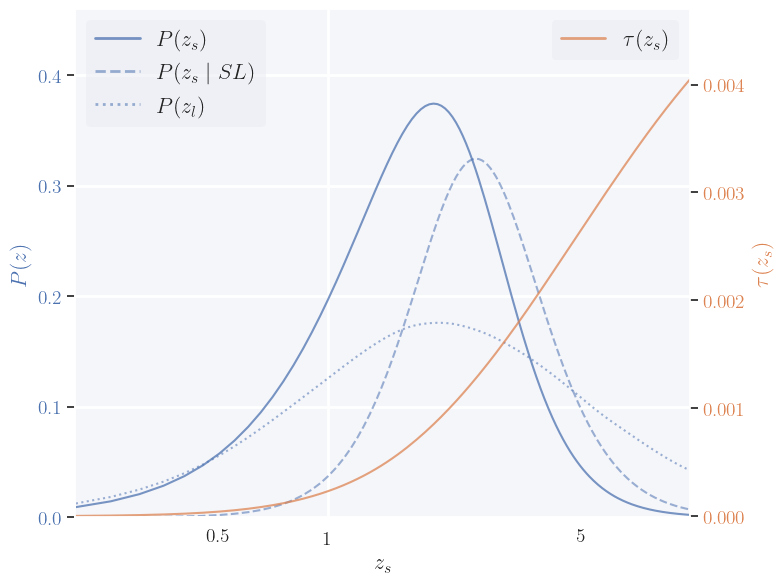

In [79]:


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

# Reset + sns theme
mpl.rcParams.update(mpl.rcParamsDefault)

LIGHT_BG = "#F5F6FA"   # panel background (very light)
LEG_BG   = "#E9EBF2"   # legend background (slightly darker so it shows)

sns.set_theme(
    style="darkgrid",
    context="notebook",
    rc={
        "axes.facecolor": LIGHT_BG,
        "figure.facecolor": "white",
        "axes.grid": True,
        "grid.color": "white",
        "grid.linestyle": "-",
        "grid.linewidth": 2.0,  # wider gridlines
        "grid.alpha": 1.0,
        "axes.axisbelow": True,
    }
)

# If you want LaTeX + serif, keep it here
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "mathtext.fontset": "custom",
    "savefig.dpi": 300,
    "axes.labelsize": 16,      # axis label size
    "xtick.labelsize": 14,     # x tick label size
    "ytick.labelsize": 14,     # y tick label size
    "legend.fontsize": 16,     # legend text size
    "legend.title_fontsize": 17, # legend title size
    "axes.titlesize": 18       # title size
})

fig, ax1 = plt.subplots(figsize=(8, 6))

# --- Left y-axis: R(z) ---
c1 = "C0"
ax1.set_xlabel(r"$z_s$", fontsize=16)
ax1.set_ylabel(r"$P(z)$", color=c1, fontsize=16)

ax1.plot(zs, Pzs, color=c1, linestyle="-",  alpha=0.75, label=r"$P(z_s)$")
ax1.plot(zs, Pzs_sl,    color=c1, linestyle="--", alpha=0.55, label=r"$P(z_s\mid SL)$")
ax1.plot(zs, Pzl,    color=c1, linestyle=":", alpha=0.55, label=r"$P(z_l)$")

ax1.tick_params(axis="y", labelcolor=c1, labelsize=14)
ax1.tick_params(axis="x", labelsize=14)
ax1.set_xlim(0.2+0.001, 10.0-0.001)
ax1.set_ylim(-0.0001,0.46-0.0001)
ax1.set_xscale('log')

# # Force specific ticks using FixedLocator
# tick_positions = [0.25, 0.5, 1, 2, 4, 8,  10]
# tick_labels = ['0.25', '0.5', '1', '2', '4', '8', '10']
# ax1.xaxis.set_major_locator(FixedLocator(tick_positions))
# ax1.xaxis.set_major_formatter(FixedFormatter(tick_labels))

# Keep background + white grid consistent (twin axes can override)
ax1.set_facecolor(LIGHT_BG)
ax1.grid(True, color="white", linewidth=2.0, alpha=1.0)  # wider gridlines

leg1 = ax1.legend(loc="upper left", handlelength=2, frameon=True, fontsize=16, title_fontsize=17)
for h in leg1.get_lines():
    h.set_linewidth(2.0)
f1 = leg1.get_frame()
f1.set_facecolor(LEG_BG)
f1.set_edgecolor("none")
f1.set_linewidth(0.0)
f1.set_alpha(0.5)

# --- Right y-axis: P(z) ---
ax2 = ax1.twinx()
c2 = "C1"
ax2.set_ylabel(r"$\tau(z_s)$", color=c2, fontsize=16)

ax2.plot(zs, tau, color=c2, linestyle="-",  alpha=0.75, label=r"$\tau(z_s)$")

ax2.tick_params(axis="y", labelcolor=c2, labelsize=14)

# Make twin axis background transparent so it doesn't mess with the panel
ax2.set_facecolor("none")
ax2.grid(False)
ax2.set_xscale('log')

ax2.set_ylim(-0.00001,0.0047-0.00000001)

# # Force specific ticks using FixedLocator
# ax2.xaxis.set_major_locator(FixedLocator(tick_positions))
# ax2.xaxis.set_major_formatter(FixedFormatter(tick_labels))

leg2 = ax2.legend(loc="upper right", handlelength=2, frameon=True, fontsize=16, title_fontsize=17)
for h in leg2.get_lines():
    h.set_linewidth(2.0)
f2 = leg2.get_frame()
f2.set_facecolor(LEG_BG)
f2.set_edgecolor("none")    
f2.set_linewidth(0.0)
f2.set_alpha(0.5)


# plt.title(r"PDF of redshifts $P(z_s)$/$P(z_s\mid SL)$ \& optical depth $\tau(z_s)$ (Blue)  (Orange)", fontsize=18)
fig.tight_layout()

# # If legends are near edges, include them to avoid clipping
fig.savefig(
    "Merger_rate_density_and_PDF_of_redshift.png",
    dpi=200,
    bbox_inches="tight",
    bbox_extra_artists=(leg1, leg2),
)
plt.show()
